<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select count(*) vacancies_cnt
                from public.vacancies
            '''

In [5]:
# результат запроса
vacancies_cnt = pd.read_sql_query(query_3_1, connection)
display(vacancies_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,vacancies_cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select count(*) employers_cnt
                from public.employers
            '''

In [7]:
# результат запроса
employers_cnt = pd.read_sql_query(query_3_2, connection)
display(employers_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers_cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select count(*) areas_cnt
                from public.areas
            '''

In [9]:
# результат запроса
areas_cnt = pd.read_sql_query(query_3_3, connection)
display(areas_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,areas_cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''select count(*) industries_cnt
                from public.industries
            '''

In [11]:
# результат запроса
industries_cnt = pd.read_sql_query(query_3_4, connection)
display(industries_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,industries_cnt
0,294


***

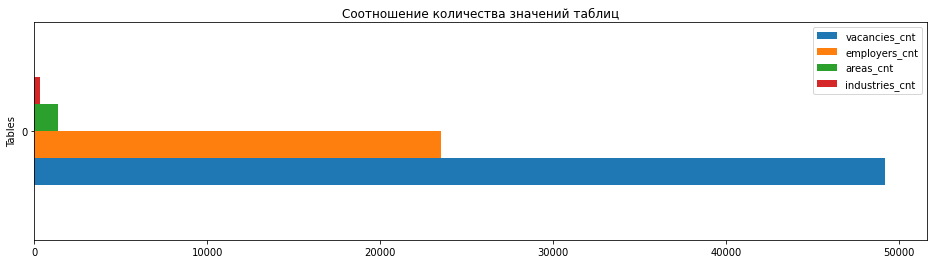

In [12]:
# выводы по предварительному анализу данных
df_cnt = pd.concat((vacancies_cnt, employers_cnt, areas_cnt, industries_cnt), axis=1)
df_cnt.plot(
    kind='barh',
    figsize=(16, 4),
    title='Соотношение количества значений таблиц',
    ylabel='Tables'
);

*На графике видно, что количество вакансий около **50 тыс**, а работодателей почти в **два раза меньше**. Это говорит нам о том, что **коэффициент** пропорциональности работодателей и вакансий равен приблизительно **двум**. Выборка по **городам** и по **сферам деятельности** довольно широкая*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
n = 5
query_4_1 = f'''select a.name area,
                    count(v.id) cnt
                from public.areas a
                    join public.vacancies v on a.id = v.area_id
                group by a.id
                order by cnt desc
                limit {n}
            '''

In [14]:
# результат запроса
area_vac_cnt = pd.read_sql_query(query_4_1, connection)
display(area_vac_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''select count(id) cnt
                from public.vacancies
                where salary_from is not null
                    or salary_to is not null
            '''

In [16]:
# результат запроса
vac_not_null_cnt = pd.read_sql_query(query_4_2, connection)
display(vac_not_null_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''select avg(salary_from) sal_from_mean,
                    avg(salary_to) sal_to_mean
                from public.vacancies
            '''

In [18]:
# результат запроса
sal_from_to_mean = pd.read_sql_query(query_4_3, connection).round()
display(sal_from_to_mean)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sal_from_mean,sal_to_mean
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
n = 1
query_4_4 = f'''select schedule,
                    employment,
                    count(id) cnt
                from public.vacancies
                group by {n}, {n+n}
                order by cnt desc
                --offset {n}
                --limit {n}
            '''

In [20]:
# результат запроса
sched_employ_cnt = pd.read_sql_query(query_4_4, connection)
display(sched_employ_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''select experience,
                    count(id) cnt
                from public.vacancies
                group by 1
                order by cnt
            '''

In [22]:
# результат запроса
experience_cnt = pd.read_sql_query(query_4_5, connection)
display(experience_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


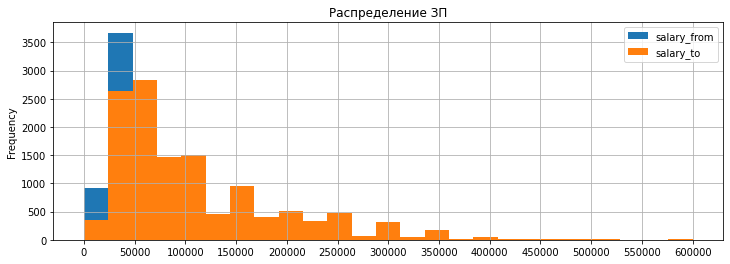

In [23]:
# выводы по детальному анализу вакансий
# Делаем запрос на обозначенную зарплату
query_salary = f''' select salary_from,
                        salary_to
                    from public.vacancies
                    where salary_from is not null
                        or salary_to is not null
                    '''
salary = pd.read_sql_query(query_salary, connection)

# Отсекаем потенциальный выброс верхней границы зарплаты и строим график распределения
salary[salary['salary_to'] < 650000].plot(
    kind='hist',
    figsize=(12, 4),
    bins=25,
    grid = True,
    xticks= range(0, 650000, 50000),
    title='Распределение ЗП'
);

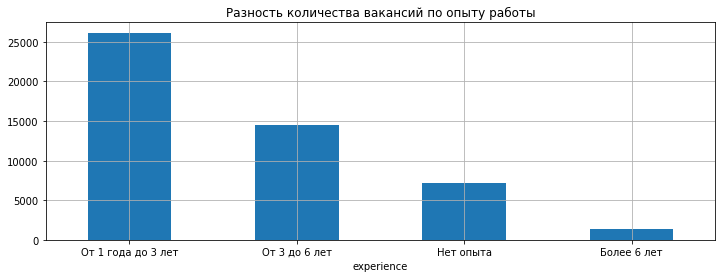

In [24]:
# Группируем данные по опыту, сортируем по большинству в порядке уменьшения.
data = experience_cnt.groupby(['experience'])['cnt'].last()
data = data.nlargest()

# Строим столбчатую диаграмму для наглядности результата
data.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    rot=0,
    title='Разность количества вакансий по опыту работы'
);

*По данным результатом можно составить **модальное** представление о вакансиях. Основная доля вакансий с указанной зарплатой около **40 тыс**. Диапозон варьируется от 30 до 105 тыс. Опыт работы **от 1 года до 3 лет**. Больше всего объявлений сосредоточено в **Москве**. Требуется **поный день**, **полная занятность**.*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
# текст запроса
# limit 10 выведем для последующего построения графика 
query_5_1 = f'''select e.name,
                    count(v.id) cnt
                from public.employers e
                    join public.vacancies v on e.id = v.employer_id
                group by e.id
                order by cnt desc
                limit 10
            '''

In [26]:
# результат запроса
employers_vac_cnt = pd.read_sql_query(query_5_1, connection)[:5]
display(employers_vac_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
# текст запроса
query_5_2 = f'''select a.name,
                    count(distinct e.id) employers_cnt,
                    count(distinct v.id) vacancies_cnt
                from public.areas a
                    left join public.vacancies v on a.id = v.area_id
                    left join public.employers e on a.id = e.area
                --where v.id is null
                group by a.id
                order by vacancies_cnt, employers_cnt desc
                --limit 3
            '''

In [28]:
# результат запроса
area_emp_vac_cnt = pd.read_sql_query(query_5_2, connection)
display(area_emp_vac_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
1357,Алматы,721,1892
1358,Новосибирск,573,2006
1359,Минск,1115,2112
1360,Санкт-Петербург,2217,2851


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
query_5_3 = f'''select e.name,
                    count(distinct area_id) area_cnt
                from public.vacancies v
                    join public.employers e on v.employer_id = e.id
                group by e.id
                order by area_cnt desc
            '''

In [30]:
# результат запроса
employers_ar_cnt = pd.read_sql_query(query_5_3, connection)
display(employers_ar_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
# текст запроса
query_5_4 = f'''select count(e.id) employer_cnt
                from public.employers e
                    left join public.employers_industries e_i on e.id = e_i.employer_id
                where e_i.industry_id is null
            '''

In [32]:
# результат запроса
employer_cnt = pd.read_sql_query(query_5_4, connection).values[0][0]
display(employer_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
# текст запроса
query_5_5 = f'''select e.name,
                    count(e_i.industry_id) industry_cnt
                from public.employers e
                    join public.employers_industries e_i on e.id = e_i.employer_id
                group by e.id
                having count(e_i.industry_id) = 4
                order by 1
                offset 2 limit 1
            '''

In [34]:
# результат запроса
industry_4_cnt = pd.read_sql_query(query_5_5, connection)
display(industry_4_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,industry_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
# текст запроса
query_5_6 = f'''select i.name,
                    count(e_i.employer_id) employer_cnt
                from public.industries i
                    join public.employers_industries e_i on i.id = e_i.industry_id
                where i.name like 'Разработка%'
                group by i.id
            '''

In [36]:
# результат запроса
result = pd.read_sql_query(query_5_6, connection)
display(result)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,employer_cnt
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
city = []
table = page.find('table', attrs={'class':'standard'}) # Находим таблицу на сайте
table_body = table.find('tbody') # Находим тело таблицы
rows = table_body.find_all('tr') # Находим ряды
for row in rows:
    cols = row.find_all('a') # Находим атрибут с названием города
    city.append(cols[0].text) # Добавляем текст (название города) из первого элемента списка
del city[0] # Удаляем лишний элемент (не обязательно)
city = tuple(city) # Преобразуем тип данных для запроса
print(city)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [38]:
# текст запроса
query_5_7 = f'''select a.name,
                    count(v.id) vacancies_cnt
                from public.employers e
                    join public.vacancies v on e.id = v.employer_id
                    join public.areas a on v.area_id = a.id
                where e.name like 'Яндекс'
                    and a.name in {city}
                group by a.id
                union
                select 'Total',
                    count(v.id)
                from public.employers e
                    join public.vacancies v on e.id = v.employer_id
                    join public.areas a on v.area_id = a.id
                where e.name like 'Яндекс'
                    and a.name in {city}
                order by 2
            '''

In [39]:
# результат запроса
areas_million = pd.read_sql_query(query_5_7, connection)
display(areas_million)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,vacancies_cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


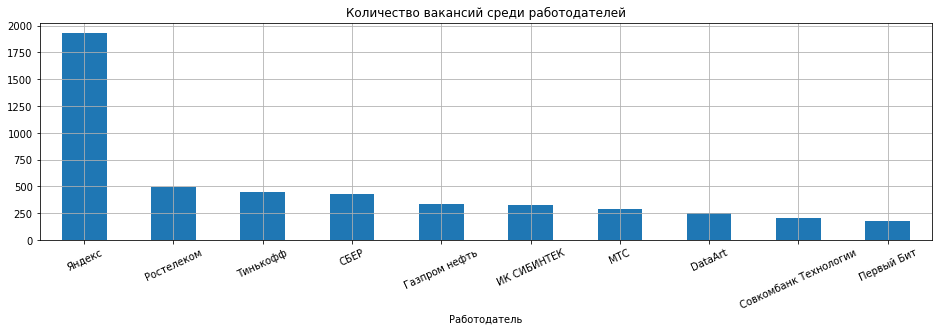

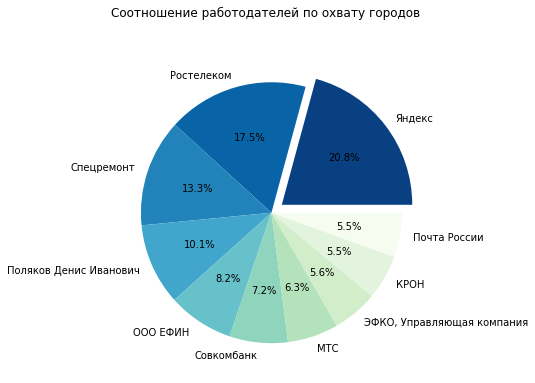

In [40]:
# выводы по анализу работодателей
# Вывлдим таблицу из запроса 5.1
df = pd.read_sql_query(query_5_1, connection)

# Группируем данные по имени работодателей, сортируем и сохраняем первые 10 позиций.
data1 = df.groupby('name').last()
data1 = data1['cnt'].nlargest(10)

# Строим столбчатую диаграмму
data1.plot(
    kind='bar',
    grid=True,
    rot=25,
    figsize=(16, 4),
    xlabel='Работодатель',
    title='Количество вакансий среди работодателей'
);

# Группируем данные по компаниям, сортируем и выводим первые 10 позиций.
data2 = employers_ar_cnt.groupby('name').last().sort_values('area_cnt', ascending=False)[:10]

# Строим круговой график соотношения работодателей по охвату городов.
data2.plot(
    kind='pie',
    figsize=(6,6),
    labels=data2.index,
    autopct = '%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    subplots=True,
    legend=False,
    ylabel='',
    colormap='GnBu_r',
    title='Соотношение работодателей по охвату городов'
);

*По результатам анализа работодателей **Яндекс** занимает лидирующую позицию по колличеству вакансий и охвату городов. Основная доля работодателей располагается в **Москве**. Второй город по количеству работодателей - **Санкт-Питербург**. Самая востребованная сфера деятельности - **Разработка программного обеспечения**.*

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [41]:
# текст запроса
query_6_1 = f'''select count(id) cnt
                from public.vacancies
                where name like '%DATA%'
                    or name like '%data%'
                    or name like '%Data%'
                    or name like '%ДАНН%'
                    or name like '%данн%'
                    or name like '%Данн%'
            '''

In [42]:
# результат запроса
v_data_cnt = pd.read_sql_query(query_6_1, connection)
display(v_data_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [43]:
# текст запроса
# Сделаем заготовку для лёгкого форматирования при фильтрации профессии Data-Science.
format_ds = f'''name ilike '%data scientist%'
                or name ilike '%data science%'
                or name ilike '%исследователь данных%'
                or (name like '%ML%' and name not ilike '%HTML%')
                or name ilike '%machine learning%'
                or name ilike '%машинн%обучен%'
            '''
# Строка запроса
query_6_2 = f'''select count(id) cnt
                from public.vacancies
                where ({format_ds})
                    and (name ilike '%junior%'
                    or experience = 'Нет опыта'
                    or employment like '%Стажировка%')
            '''

In [44]:
# результат запроса
beginner_ds_cnt = pd.read_sql_query(query_6_2, connection)
display(beginner_ds_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_6_3 = f'''select count(id) cnt
                from public.vacancies
                where ({format_ds})
                    and (key_skills ilike '%SQL%'
                    or experience ilike '%postgres%')
            '''

In [46]:
# результат запроса
sql_cnt = pd.read_sql_query(query_6_3, connection)
display(sql_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query_6_4 = f'''select count(id) cnt
                from public.vacancies
                where ({format_ds})
                    and (key_skills ilike '%python%')
            '''

In [48]:
# результат запроса
py_cnt = pd.read_sql_query(query_6_4, connection)
display(py_cnt)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
query_6_5 = f'''select round(avg(length(key_skills)-length(replace(key_skills, chr(9), ''))+1), 2) skills_avg
                from public.vacancies
                where {format_ds}
            '''

In [50]:
# результат запроса
kskill_avg = pd.read_sql_query(query_6_5, connection)
display(kskill_avg)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skills_avg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [51]:
# текст запроса
query_6_6 = f'''select 
                    experience,
                    round(avg(CASE WHEN salary_from is not null
                        and salary_to is not null
                    THEN (salary_from + salary_to)/2
                    ELSE coalesce(salary_from, 0) + coalesce(salary_to, 0)
                    END)) salary_avg
                from public.vacancies
                where ({format_ds})
                    and (salary_from is not null
                    or salary_to is not null)
                    group by 1
                    --having experience = 'От 3 до 6 лет'
            '''

In [52]:
# результат запроса
salary_ds_avg = pd.read_sql_query(query_6_6, connection)
display(salary_ds_avg)

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,salary_avg
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

3.6


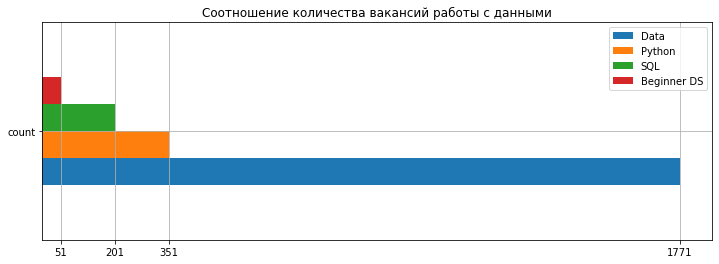

In [53]:
# выводы по предметному анализу
# Выводим долю вакансий с данными от общего количества вакансий в процентах
print(round(v_data_cnt.iloc[0][0] / vacancies_cnt.iloc[0][0]*100, 2))

# Объединяем выводы по количеству вакансий требующие работу с данными, начинающего специалиста Data-Science, навык SQL и Python
data = pd.concat([v_data_cnt, beginner_ds_cnt, sql_cnt, py_cnt], axis=1)
data.columns = ('Data', 'Beginner DS', 'SQL', 'Python')
data.index = ['count']

# Сортируем значения по убыванию
data = data.sort_values(by='count', axis=1, ascending=False)

# Строим диаграмму соотношения
data.plot(
    kind='barh',
    figsize=(12, 4),
    grid=True,
    xticks=data.iloc[0][:],
    title='Соотношение количества вакансий работы с данными'
);

*Доля вакансий специализирующихся на **данных** составляет почти **3.6 процента**. Ключевого навыка владения **Python** требуется **больше**, чем навыка владения **SQL**. Вакансий для **начинающих дата-саейнтистов** немного, **51**. Требование различных **навыков** в выборке вакансий по профессии **Data-Science** в среднем **больше 6-ти**.*  

*Это показывает, что большая часть вакансий с требованием навыков, как минимум **Puthon\SQL**, нуждается в продвинутых специалистах. Так же, по этой профессии **в среднем**, мы видим высокие зарплаты для стран СНГ. С опытом работы **от 3 до 6 лет** - ~240 тыс. С опытом работы от **1 до 3 лет** выше ста тысяч - в средннем, почти, 140 тыс.*

# Общий вывод по проекту

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,employer_cnt,vacancies_cnt,coefficient
0,Разработка программного обеспечения,3553,12499,3.5
1,"Системная интеграция, автомат...",2993,11034,3.7
2,"Интернет-компания (поисковики,...",1675,6413,3.8
3,"Маркетинговые, рекламные, BTL,...",798,1001,1.3
4,Консалтинговые услуги,662,1137,1.7
5,Кадровые агентства,389,1143,2.9
6,"Электронно-вычислительная, опт...",374,622,1.7
7,Розничная сеть (продуктовая),368,1034,2.8
8,Интернет-магазин,351,788,2.2
9,"Архитектура, проектирование",346,375,1.1


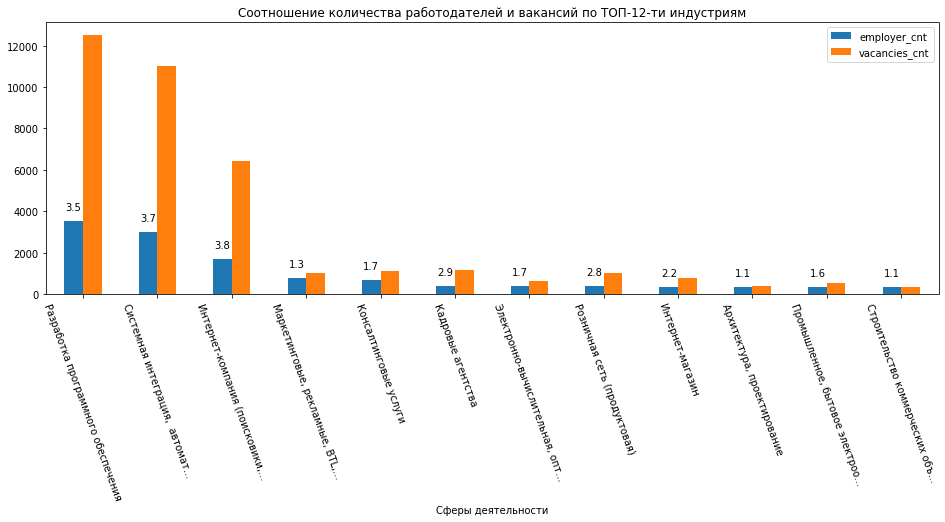

In [54]:
# Для большего представления о базе данных чуть шире раскроем анализ о сферах деятельности.
# Выведем наименования индустрий с подсчётом вакансий по ним. Отсортируем по убыванию. Сократим до 50 строк.
# Текст запроса.
query_industries_vac = f'''select i.name,
                    count(v.id) vacancies_cnt
                from public.industries i
                    left join public.employers_industries ei on i.id = ei.industry_id
                    left join public.employers e on ei.employer_id = e.id
                    left join public.vacancies v on v.employer_id = e.id
                group by i.id
                order by 2 desc
                limit 50
            '''
# Вывод запроса.
industries_vac_cnt = pd.read_sql_query(query_industries_vac, connection)

# Выведем ТОП-12 наименований индустрий по количеству работодателей.
# Текст запроса.
query_industries_emp = f'''select i.name,
                    count(ei.employer_id) employer_cnt
                from public.industries i
                    join public.employers_industries ei on i.id = ei.industry_id
                group by i.id
                order by 2 desc
                limit 12
            '''
# Вывод запроса.
industries_emp_cnt = pd.read_sql_query(query_industries_emp, connection)


# Объединим два запроса в одну таблицу по наименованию сфер деятельности.
data = industries_emp_cnt.merge(industries_vac_cnt, on='name', how='left')

# Сократим наименования до нескольких десятков симолов.
data['name'] = data['name'].apply(lambda x: x if len(x.split(' ')) < 5 else x[:30] + '...')

# Добавим столбец с коэффициентом пропорциональности работодателей и вакансий
data['coefficient'] = round(1/(data['employer_cnt'] / data['vacancies_cnt']), 1)
display(data)

# Сгруппируем данные по индустриям, избавимся от числовых индексов, отсортируем по убыванию.
group_data = data.groupby(
    ['name'],
    as_index=True
)[['employer_cnt', 'vacancies_cnt']].last().sort_values(['employer_cnt', 'vacancies_cnt'], ascending=False)

# Построим диаграмму по резултирующей таблице.
plot_bar = group_data.plot(
    kind='bar',
    figsize=(16, 5),
    rot=290,
    xlabel='Сферы деятельности',
    title='Соотношение количества работодателей и вакансий по ТОП-12-ти индустриям'
);
# Добавим к столбцам аннотацию коэффициента пропорциональности.
plot_bar.bar_label(plot_bar.containers[0], labels=data['coefficient'], padding=9);

*Больше всего вакансий можно наблюдать от **"Яндекс"** т.к. это самая популярная и широкая компания предлагающая множество услуг и имеющая немало агрегаторов в разных сферах деятельности. Не удивитеьно, что основная доля вакансий резмещена в **Москве**. Ввиду развития современных информационных технологий наименование индустрии **"Разработка программного обеспечения"** занимает лидирующее место по количеству вакансий и работодателей.*  

*Можно предположить, что сферы деятельности связанные с информационными технологиями, рано или поздно, обеспечат необходимое число сотрудников за счет большого количества новоиспечённых специалистов из ВУЗов и по обучающим курсам, которые уже будут иметь необходимый опыт для современных целей и задач. И, хоть это направление не перестанет быть популярным, коэффициент работодателей и вакансий может уравняться.*  

*На данный момент можно более детально проанализировать вакансии и распределение зарплат по профессии **Data-Science** среди трёх групп специалистов разного уровня **Junior**, **Middle**, **Senior\Lead**. И посмотреть в ком действительно нуждаются компании в нынешних реалиях.*

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Средняя зарплата Junior-специалиста: 64821.5
Средняя зарплата Middle-специалиста: 187500.0


c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Средняя зарплата Senior\Lead-специалистов: 209057.5


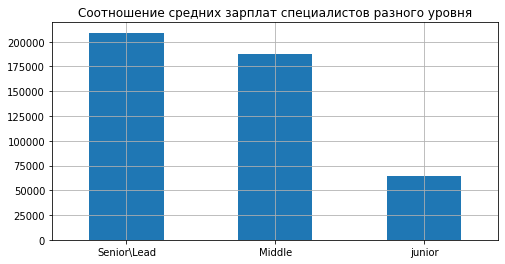

In [55]:
# Загатовка к запросу о зарплатах.
experience_salary = '''experience,
        round(avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2)) salary_avg'''
            
# Текст запроса о зарплатах среди junior-специалистов
query_junior = f'''select {experience_salary}
                from public.vacancies
                where ({format_ds})
                    and (name ilike '%junior%'
                    or experience = 'Нет опыта')
                    and (salary_from is not null
                    or salary_to is not null)
                    group by 1
            '''
# Вывод запроса.
junior_ds_cnt = pd.read_sql_query(query_junior, connection)['salary_avg'].mean()
print('Средняя зарплата Junior-специалиста:', junior_ds_cnt)

# Текст запроса о зарплатах среди middle-специалистов.
query_middle = f'''select {experience_salary}
                from public.vacancies
                where ({format_ds})
                    and (name ilike '%middle%'
                    and (experience = 'От 3 до 6 лет'
                    or experience = 'От 1 года до 3 лет'))
                    and (salary_from is not null
                    or salary_to is not null)
                    group by 1
            '''
# Вывод запроса.
middle_ds_cnt = pd.read_sql_query(query_middle, connection)['salary_avg'].mean()
print('Средняя зарплата Middle-специалиста:', middle_ds_cnt)

# Текст запроса о зарплатах среди lead\senior-специалистов.
query_senior = f'''select {experience_salary}
                from public.vacancies
                where ({format_ds})
                    and ((name ilike '%senior%'
                    or name ilike '%lead%'
                    and experience = 'От 1 года до 3 лет')
                    or (experience = 'От 3 до 6 лет'))
                    and (salary_from is not null
                    or salary_to is not null)
                    group by 1
            '''
# Вывод запроса.
senior_ds_cnt = pd.read_sql_query(query_senior, connection)['salary_avg'].mean()
print('Средняя зарплата Senior\Lead-специалистов:', senior_ds_cnt)

# Объединим выводы в массив Series.
salary_df = pd.Series(
    [senior_ds_cnt, middle_ds_cnt, junior_ds_cnt],
    index=['Senior\Lead', 'Middle', 'junior'],
    name='Salary'
)

# Построим столбчатую диаграмму средних зарплат специалистов разного уровня.
salary_df.plot(
    kind='bar',
    figsize=(8, 4),
    grid=True,
    rot = 0,
    title='Соотношение средних зарплат специалистов разного уровня'
);

*По результатам анализа зарплат среди разного уровня специалистов можно прийти к некоторому умозаключению. Разница **средних** зарплат между **Senior\Lead** и **Middle** специалистов не велика, а вот по сравнению с специалистами уровня **Junior** уже вполне заметна. По предварительному анализу график количества вакансий среди этих же групп специалистов похожий. Вакансий низкого уровня **около 50-ти**, а среднего и высокого **выше 200**.*  

*Это говорит о том, что спрос на уровни **Middle+** выше, чем на **Junior**, следовательно рыночным законам зарплаты могут существенно отличаться. Возможно это связано из-за большого количества курсов обучающих много людей новой профессии, навыков которых хватает для работы. Но для более высокого требования должно пройти какое-то время, в течении которого начинающий специалист наберётся опыта и будет повышать уровень квалификации.*

Данный датасет о работодателях и вакансиях предоставляет возможность для объёмного анализа вакансий компаний разного рода деятельности. В будущем можно проанализировать вакансии на любые другие должности компаний в интересующих индустриях.

In [58]:
os.getcwd()

'c:\\Users\\Dmitriy Chuprinko\\Desktop\\VS Code SkillFactory\\PROJECT-2. Анализ вакансий из HeadHunter'